# [Stingray Simulator](https://docs.stingray.science/simulator.html#getting-started)

In [1]:
import numpy as np
from stingray import Lightcurve, sampledata
from stingray.simulator import simulator, models

sim = simulator.Simulator(N=1024, mean=0.5, dt=0.125, rms=1.0)

sim = simulator.Simulator(N=1024, mean=0.5, dt=0.125, rms=1.0)
lc = sim.simulate(2)

Passing beta as 1 gives a flicker-noise distribution, 
while a beta of 2 generates a random-walk distribution.

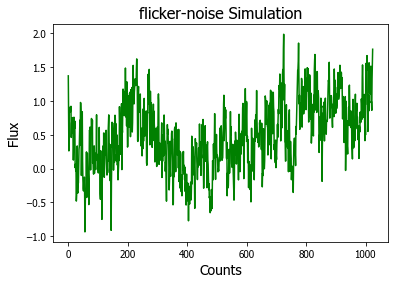

In [4]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Tahoma']

import matplotlib.pyplot as plt
from stingray.simulator import simulator

# Instantiate simulator object
sim = simulator.Simulator(N=1024, mean=0.5, dt=0.125, rms=1.0)
# Specify beta value
lc = sim.simulate(1)

plt.plot(lc.counts, 'g')
plt.title('flicker-noise Simulation', fontsize='16')
plt.xlabel('Counts', fontsize='14', )
plt.ylabel('Flux', fontsize='14')
plt.show()

/Users/lyubing/opt/anaconda3/lib/python3.9/site-packages/stingray/utils.py:142: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment. All analysis in the light curve will assume Poisson errors. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)


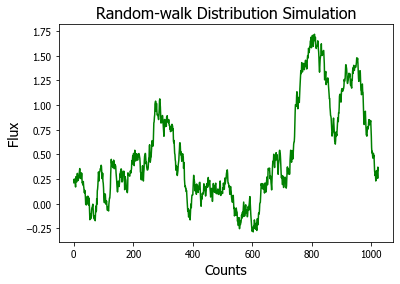

In [2]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Tahoma']

import matplotlib.pyplot as plt
from stingray.simulator import simulator

# Instantiate simulator object
sim = simulator.Simulator(N=1024, mean=0.5, dt=0.125, rms=1.0)
# Specify beta value
lc = sim.simulate(2)

plt.plot(lc.counts, 'g')
plt.title('Random-walk Distribution Simulation', fontsize='16')
plt.xlabel('Counts', fontsize='14', )
plt.ylabel('Flux', fontsize='14')
plt.show()

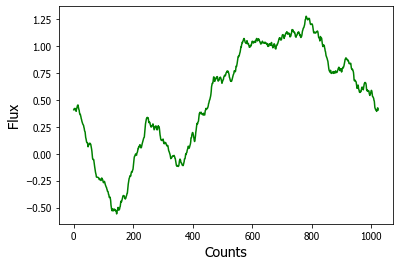

In [5]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Tahoma']

import matplotlib.pyplot as plt
from stingray.simulator import simulator

# Instantiate simulator object
sim = simulator.Simulator(N=1024, mean=0.5, dt=0.125, rms=1.0)
# Specify beta value
lc = sim.simulate(2.6)

plt.plot(lc.counts, 'g')
#plt.title('flicker-noise Simulation', fontsize='16')
plt.xlabel('Counts', fontsize='14', )
plt.ylabel('Flux', fontsize='14')
plt.show()

In [8]:
import astropy

# User-defined Model

In [29]:
def double_broken_power(f,fl,fh,Al,A,beta):
    if f <= fl:
        return Al
    elif f<=fh:
    
        return A*(f/fh)**-1
    else :
        return A*(f/fh)**(-beta)
    
     

In [37]:
def piecewise_double_broken_power(f,fl,fh,Al,A,beta): 
    #y4=np.array(list(map(double_broken_power(fl=fl,fh=fh,Al=Al,A=A,beta=beta),t)))  #使用map对迭代器有元素操作时，func不带参数
    y3=np.piecewise(f,[f <= fl, (f<=fh)&(f>fl),f>fh],[lambda x:Al,lambda x: A*(x/fh)**-1,lambda x:A*(x/fh)**(-beta)])   #以上对切片的逻辑运算（且）都需要变成位运算&而不能用and不然会报错
    
    return y3

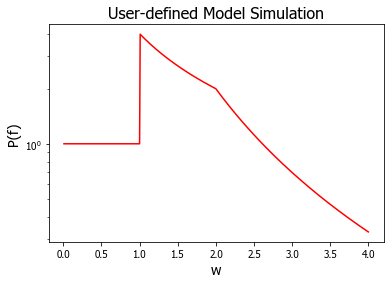

In [41]:
plt.plot(w,spectrum, 'r')
plt.title('User-defined Model Simulation', fontsize='16')
plt.xlabel('w', fontsize='14')
plt.ylabel('P(f)', fontsize='14')
plt.semilogy()
plt.show()

In [10]:
b1= astropy.modeling.powerlaws.BrokenPowerLaw1D(amplitude=1, x_break=1, alpha_1=0, alpha_2=-1)

b2= astropy.modeling.powerlaws.BrokenPowerLaw1D(amplitude=1, x_break=3, alpha_1=-1, alpha_2=-2)

b12=b1+b2

b12(0.5),b12(1.5),b12(2.5)

In [47]:
2**17

131072

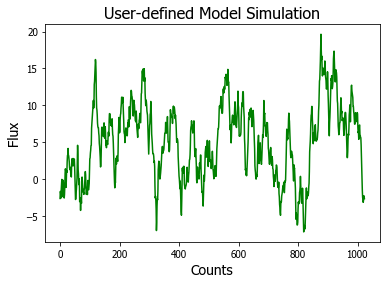

In [52]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Tahoma']

import matplotlib.pyplot as plt
from stingray.simulator import simulator

# Instantiate simulator object
sim = simulator.Simulator(N=1024, mean=5, dt=0.125, rms=1.0)
# Define a spectrum
w = np.fft.rfftfreq(sim.N, d=sim.dt)[1:]

#spectrum = np.power((1/w),2/2)
spectrum =  piecewise_double_broken_power(w,0.01,0.2,1,1,2.6)
# Simulate
lc = sim.simulate(spectrum)

plt.plot(lc.counts, 'g')
plt.title('User-defined Model Simulation', fontsize='16')
plt.xlabel('Counts', fontsize='14')
plt.ylabel('Flux', fontsize='14')
plt.show()

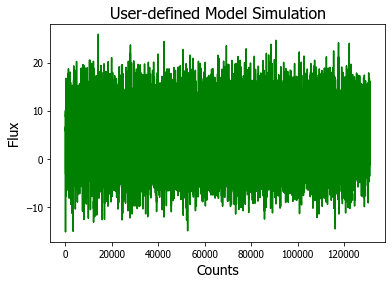

In [51]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Tahoma']

import matplotlib.pyplot as plt
from stingray.simulator import simulator

# Instantiate simulator object
sim = simulator.Simulator(N=2**17, mean=5, dt=10000, rms=1.0)
# Define a spectrum
w = np.fft.rfftfreq(sim.N, d=sim.dt)[1:]

#spectrum = np.power((1/w),2/2)
spectrum =  piecewise_double_broken_power(w,2e-7,4e-6,7200,6000,2.6)
# Simulate
lc = sim.simulate(spectrum)

plt.plot(lc.counts, 'g')
plt.title('User-defined Model Simulation', fontsize='16')
plt.xlabel('Counts', fontsize='14')
plt.ylabel('Flux', fontsize='14')
plt.show()

In [33]:
min(w),max(w)

(0.0078125, 4.0)

# Using Impulse Response¶

/Users/lyubing/opt/anaconda3/lib/python3.9/site-packages/stingray/utils.py:142: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment. All analysis in the light curve will assume Poisson errors. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)


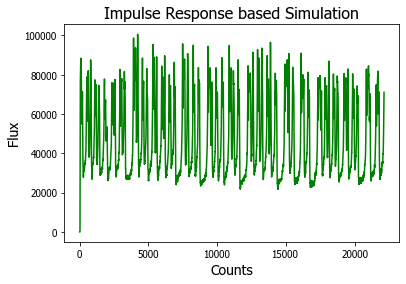

In [42]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Tahoma']

import matplotlib.pyplot as plt
from stingray import sampledata
from stingray.simulator import simulator

# Obtain a sample light curve
lc = sampledata.sample_data().counts
# Instantiate simulator object
sim = simulator.Simulator(N=1024, mean=0.5, dt=0.125, rms=1.0)
# Obtain an artificial impulse response
ir = sim.relativistic_ir()
# Simulate
lc_new = sim.simulate(lc, ir)

plt.plot(lc_new.counts, 'g')
plt.title('Impulse Response based Simulation', fontsize='16')
plt.xlabel('Counts', fontsize='14')
plt.ylabel('Flux', fontsize='14')
plt.show()